# Create SiPM PSF for DEMOPP, to use with Beersheba.

This notebook shows how to extract the PSFs from Kr events and their reading.

In [1]:
import sys,os,os.path
sys.path.append("../../../")   # cite IC from parent directory
                            # NOTE if you can't import IC stuff, its because of the
                            # above line
#sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

import os
import glob
import numpy  as np
import pandas as pd
import tables as tb
import matplotlib.pyplot as plt

from IC.invisible_cities.reco.psf_functions    import create_psf
from IC.invisible_cities.reco.psf_functions    import hdst_psf_processing
from IC.invisible_cities.reco.psf_functions    import add_empty_sensors_and_normalize_q
from IC.invisible_cities.reco.psf_functions    import add_variable_weighted_mean

import IC.invisible_cities.core.core_functions as     coref
import IC.invisible_cities.io  .dst_io         as     dstio

from IC.invisible_cities.database              import load_db
#from IC.invisible_cities.io      .kdst_io      import psf_writer
# he's dead jim, make psf_writer yourself

## code deprecated, including here

In [3]:
class PSFfactors(tb.IsDescription):
    nevt   = tb. UInt32Col(pos=0)
    xr     = tb.Float32Col(pos=1)
    yr     = tb.Float32Col(pos=2)
    zr     = tb.Float32Col(pos=3)
    x      = tb.Float32Col(pos=4)
    y      = tb.Float32Col(pos=5)
    z      = tb.Float32Col(pos=6)
    factor = tb.Float32Col(pos=7)

def psf_writer(hdf5_file, **kwargs):
    psf_table = make_table(hdf5_file,
                           group       = "PSF",
                           name        = "PSFs",
                           fformat     = PSFfactors,
                           description = "XYZ dependent point spread functions",
                           compression = 'ZLIB4')

    def write_psf(xr, yr, zr, xp, yp, zp, fr, nr):
        row = psf_table.row
        for i, x in enumerate(xr):
            for j, y in enumerate(yr):
                for k, z in enumerate(zr):
                    row["xr"    ] = x
                    row["yr"    ] = y
                    row["zr"    ] = z
                    row["x"     ] = xp
                    row["y"     ] = yp
                    row["z"     ] = zp
                    row["factor"] = fr[i,j,k]
                    row["nevt"  ] = nr[i,j,k]
                    row.append()
    return write_psf

## Read the PSF

In [5]:
psf_filename = 'NEXT100_PSF_kr83m_5bar.h5'
psf_path = 'psfs/'
out_psf  = psf_path + psf_filename

In [8]:
#psf =  dstio.load_dst(psf_path + 'demopp.kr83m_MC_RUN8.psf.h5', 'PSF', 'PSFs')
psf_data8 = dstio.load_dst(psf_path + 'demopp.kr83m_DATA_RUN8.psf.h5', 'PSF', 'PSFs')
psf_data9 = dstio.load_dst(psf_path + 'demopp.kr83m_DATA_RUN9.psf.h5', 'PSF', 'PSFs')
psf_data10 = dstio.load_dst(psf_path + 'demopp.kr83m_DATA_RUN10.psf.h5', 'PSF', 'PSFs')
psf_dataN100 = dstio.load_dst(psf_path + 'NEXT100_PSF_kr83m_5bar.h5', 'PSF', 'PSFs')
psf_idk = dstio.load_dst(psf_path + 'V3_PSF_dst_bin1.0_sum_collapsed_rAll.h5', 'PSF', 'PSFs')

psf = psf_data8 # THIS ISNT THE SAME AS ITS DATA NOT MC

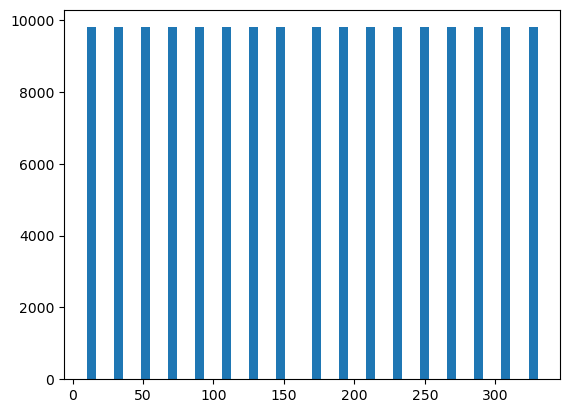

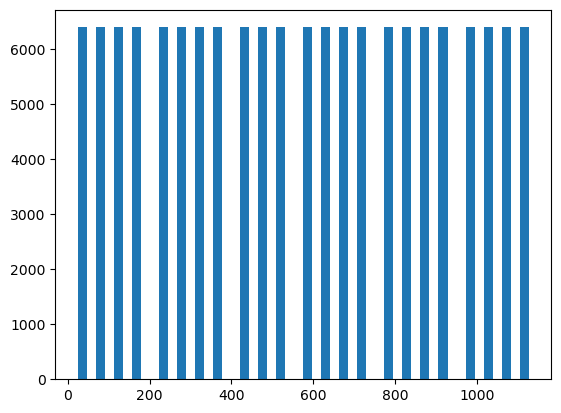

In [23]:
plt.hist(psf_data8.z, bins=50)
plt.show()
plt.hist(psf_dataN100.z, bins=50)
plt.show()

In [10]:
psf[(psf.z == z_pos) & (psf.xr == 0) & (psf.yr == 0)]

NameError: name 'z_pos' is not defined

In [38]:
z_pos = 70.
z_pos_N100 = 75.
y_pos = 0.

### we dont have the MC, so ignore the MC output

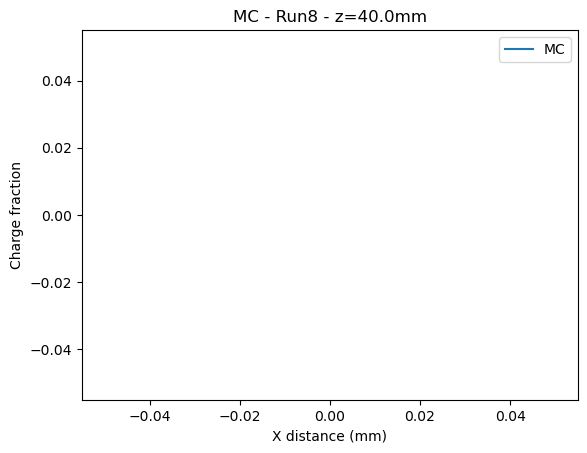

In [29]:
bin_size   = 1
Xrange     = [ -100, 100]
Yrange     = [ -100, 100]
ranges     = [Xrange, Yrange]
nbinX      = int(np.diff(Xrange)/bin_size)
nbinY      = int(np.diff(Yrange)/bin_size)

psf_cut = psf[(psf.z == z_pos)]
x, y = sorted(set(psf_cut.xr)), psf_cut.groupby(['xr'])['factor'].sum().values


plt.plot(x, y, label = 'MC')
plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'MC - Run8 - z={z_pos}mm')
plt.legend()

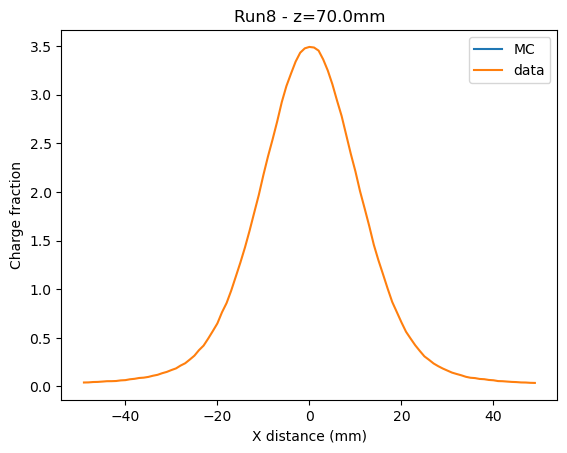

In [39]:
psf_data_cut = psf_data8[(psf_data8.z == z_pos)]
x_data, y_data = sorted(set(psf_data_cut.xr)), psf_data_cut.groupby(['xr'])['factor'].sum().values


plt.plot(x, y, label = 'MC')
plt.plot(x_data, y_data, label = 'data')
plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'Run8 - z={z_pos}mm')
plt.legend()

## Here lets do all the ones we have

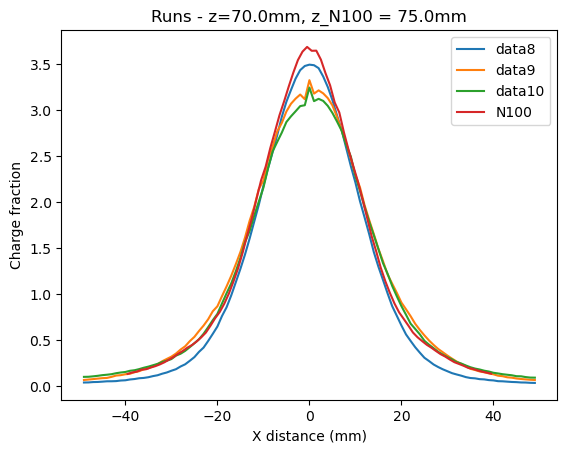

In [42]:
psf_data9_cut = psf_data9[(psf_data9.z == z_pos)]
x_data9, y_data9 = sorted(set(psf_data9_cut.xr)), psf_data9_cut.groupby(['xr'])['factor'].sum().values

psf_data10_cut = psf_data10[(psf_data10.z == z_pos)]
x_data10, y_data10 = sorted(set(psf_data10_cut.xr)), psf_data10_cut.groupby(['xr'])['factor'].sum().values

psf_dataN100_cut = psf_dataN100[(psf_dataN100.z == z_pos_N100)]
x_dataN100, y_dataN100 = sorted(set(psf_dataN100_cut.xr)), psf_dataN100_cut.groupby(['xr'])['factor'].sum().values





plt.plot(x_data, y_data, label = 'data8')
plt.plot(x_data9, y_data9, label = 'data9')
plt.plot(x_data10, y_data10, label = 'data10')
plt.plot(x_dataN100, y_dataN100, label = 'N100')
plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'Runs - z={z_pos}mm, z_N100 = {z_pos_N100}mm')
plt.legend()

In [32]:
psf_dataN100_cut

,xr,yr,zr,x,y,z,factor,nevt


In [36]:
psf_dataN100.head(10)

,xr,yr,zr,x,y,z,factor,nevt
0,-39.5,-39.5,0,0.0,0.0,25.0,0.000793,109.0
1,-39.5,-39.5,0,0.0,0.0,75.0,0.000713,137.0
2,-39.5,-39.5,0,0.0,0.0,125.0,0.000715,132.0
3,-39.5,-39.5,0,0.0,0.0,175.0,0.000758,121.0
4,-39.5,-39.5,0,0.0,0.0,225.0,0.000701,108.0
5,-39.5,-39.5,0,0.0,0.0,275.0,0.000589,81.0
6,-39.5,-39.5,0,0.0,0.0,325.0,0.000654,86.0
7,-39.5,-39.5,0,0.0,0.0,375.0,0.000739,83.0
8,-39.5,-39.5,0,0.0,0.0,425.0,0.000707,99.0
9,-39.5,-39.5,0,0.0,0.0,475.0,0.000676,93.0


In [37]:
psf_data8.head(10)

,nevt,xr,yr,zr,x,y,z,factor
0,176,-49.0,-49.0,0.0,0.0,0.0,10.0,0.000000
1,588,-49.0,-49.0,0.0,0.0,0.0,30.0,0.000040
2,820,-49.0,-49.0,0.0,0.0,0.0,50.0,0.000094
3,940,-49.0,-49.0,0.0,0.0,0.0,70.0,0.000378
4,964,-49.0,-49.0,0.0,0.0,0.0,90.0,0.000240
5,1040,-49.0,-49.0,0.0,0.0,0.0,110.0,0.000293
6,988,-49.0,-49.0,0.0,0.0,0.0,130.0,0.000170
7,1064,-49.0,-49.0,0.0,0.0,0.0,150.0,0.000256
8,1120,-49.0,-49.0,0.0,0.0,0.0,170.0,0.000084
9,1104,-49.0,-49.0,0.0,0.0,0.0,190.0,0.000211


In [16]:
psf_data7_cut = psf_data7[(psf_data7.z == z_pos)]
x_data7, y_data7 = sorted(set(psf_data7_cut.xr)), psf_data7_cut.groupby(['xr'])['factor'].sum().values


plt.plot(x, y, label = 'Run8 MC')
plt.plot(x_data, y_data, label = 'Run8 data')
plt.plot(x_data7, y_data7, label = 'Run7 data')
plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'z={z_pos}mm')
plt.legend()

NameError: name 'psf_data7' is not defined

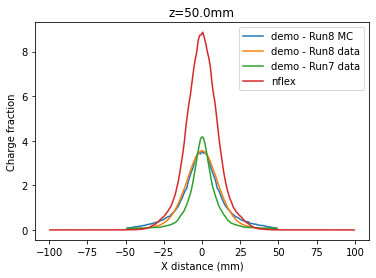

In [125]:
psf_nflex_cut = psf_nflex[(psf_nflex.z == z_pos)]
x_flex, y_flex = sorted(set(psf_nflex_cut.xr)), psf_nflex_cut.groupby(['xr'])['factor'].sum().values


plt.plot(x, y, label = 'demo - Run8 MC')
plt.plot(x_data, y_data, label = 'demo - Run8 data')
plt.plot(x_data7, y_data7, label = 'demo - Run7 data')
plt.plot(x_flex, y_flex, label = 'nflex')
plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'z={z_pos}mm')
plt.legend()

In [126]:
y_nw=y/max(y_data)
y_data_nw=y_data/max(y_data)
y_data7_nw=y_data7/max(y_data7)
y_flex_nw = y_flex/max(y_flex)

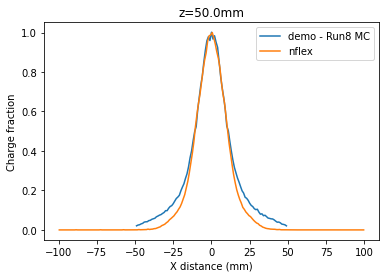

In [127]:
plt.plot(x, y_nw, label = 'demo - Run8 MC')
#plt.plot(x_data, y_data_nw, label = 'demo - Run8 data')
#plt.plot(x_data7, y_data7_nw, label = 'demo - Run7 data')
plt.plot(x_flex, y_flex_nw, label = 'nflex')
plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'z={z_pos}mm')
plt.legend()

In [98]:
psf_LT = pd.read_hdf("/data5/users/gdiaz/DEMOPP-Run8/LightTables/DEMOPP-Run8_PSF.h5", "PSF/LightTable")
psf_LT.head()

,dist_xy,z_m1,z_m2,z_m3,z_m4,z_m5
0,0,0.000028,0.000033,0.000038,0.000045,0.000054
1,1,0.000027,0.000032,0.000037,0.000044,0.000050
2,2,0.000027,0.000031,0.000035,0.000041,0.000047
3,3,0.000025,0.000029,0.000033,0.000038,0.000044
4,4,0.000024,0.000027,0.000030,0.000034,0.000039


In [116]:
charge_LT = psf_LT.drop(['dist_xy'], axis='columns').reset_index(drop=True).mean(axis=1).values
charge_LT= charge_LT/sum(charge_LT)
x_LT = psf_LT.dist_xy.values

In [117]:
x_LT

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [118]:
x_LT_nw = []
for i in x_LT: 
    x_LT_nw.append(i+0.5)

array([0.09054715, 0.08688947, 0.08259722, 0.07753012, 0.07093707,
       0.06379582, 0.05749449, 0.05075979, 0.04463916, 0.03915114,
       0.03710989, 0.03225313, 0.0278208 , 0.0241278 , 0.02161747,
       0.01858446, 0.01662031, 0.01507215, 0.01340642, 0.01114322,
       0.01056329, 0.00930542, 0.00835433, 0.00757385, 0.00683289,
       0.00616658, 0.00558701, 0.00511181, 0.00470618, 0.00427717,
       0.00408984, 0.00377909, 0.0035175 , 0.00327954, 0.00305824,
       0.00292917, 0.00274469, 0.00256766, 0.00244375, 0.00233898,
       0.00222404, 0.00212446, 0.00203173, 0.00196528, 0.00189524,
       0.00178286, 0.00173009, 0.00169122, 0.00164797, 0.00158307])

In [20]:
sum(charge_LT)

0.9999999999999998

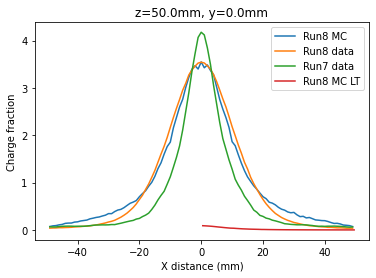

In [119]:
plt.plot(x, y, label = 'Run8 MC')
plt.plot(x_data, y_data, label = 'Run8 data')
plt.plot(x_data7, y_data7, label = 'Run7 data')
plt.plot(x_LT_nw, charge_LT, label = 'Run8 MC LT')
plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'z={z_pos}mm, y={y_pos}mm')
plt.legend()

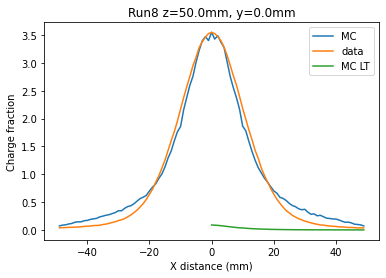

In [95]:
plt.plot(x, y, label = 'MC')
plt.plot(x_data, y_data, label = 'data')
plt.plot(x_LT, charge_LT, label = 'MC LT')
plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction')
plt.title(f'Run8 z={z_pos}mm, y={y_pos}mm')
plt.legend()

In [120]:
y=y/max(y)
y_data=y_data/max(y_data)
charge_LT=charge_LT/max(charge_LT)

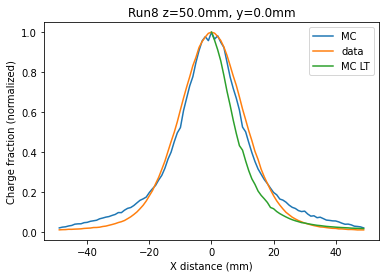

In [121]:
plt.plot(x, y, label = 'MC')
plt.plot(x_data, y_data, label = 'data')
plt.plot(x_LT, charge_LT, label = 'MC LT')
plt.xlabel('X distance (mm)')
plt.ylabel('Charge fraction (normalized)')
plt.title(f'Run8 z={z_pos}mm, y={y_pos}mm')
plt.legend()